In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pyod.models.iforest import IForest
import pickle

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
df = pd.read_parquet('../Dataset/channels_4146.parquet')

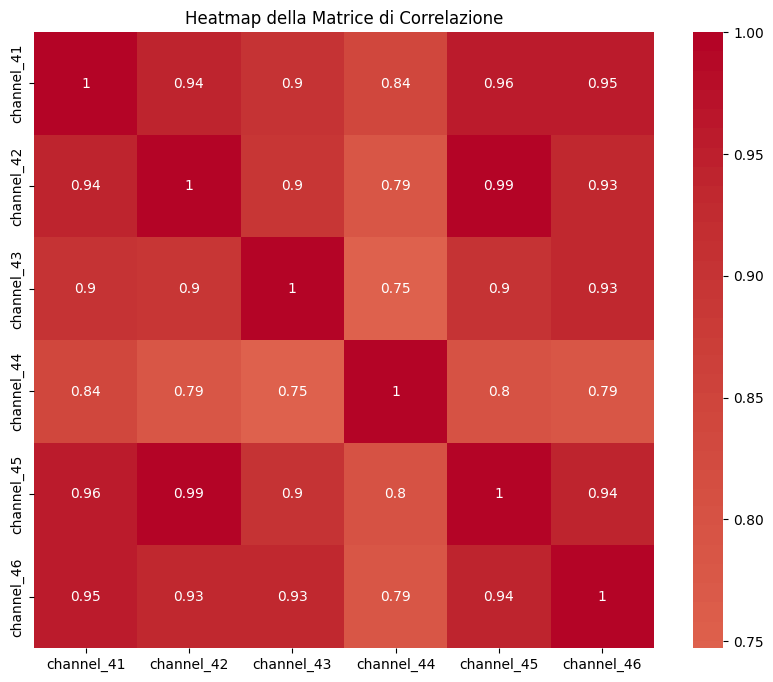

In [3]:
correlation_matrix = df.drop('is_anomaly', axis=1).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap della Matrice di Correlazione')
plt.show()

# Isolation Forest

In [ ]:
'''
model = IForest(contamination=0.11)

model.fit(df)

with open("../Models/IForest_41_46_011.pkl", "wb") as file:
    pickle.dump(model, file)
'''

In [4]:
with open("../Models/IForest_41_46_011.pkl", "rb") as file:
    model = pickle.load(file)
df["Anomaly"] = model.labels_

In [5]:
accuracy = accuracy_score(df['is_anomaly'], model.labels_)
precision = precision_score(df['is_anomaly'], model.labels_)
recall = recall_score(df['is_anomaly'], model.labels_)
f1 = f1_score(df['is_anomaly'], model.labels_)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9867181058859322
Precision: 0.9161689656790007
Recall: 0.9612694481718848
F1 Score: 0.9381774971398955


In [6]:
print("Count labels results")
print(df['Anomaly'].value_counts())

print("\nCount labels truth")
print(df['is_anomaly'].value_counts())

Count labels results
Anomaly
0    13108205
1     1620116
Name: count, dtype: int64

Count labels truth
is_anomaly
0    13184217
1     1544104
Name: count, dtype: int64


is_anomaly
0    773
1    227
Name: count, dtype: int64


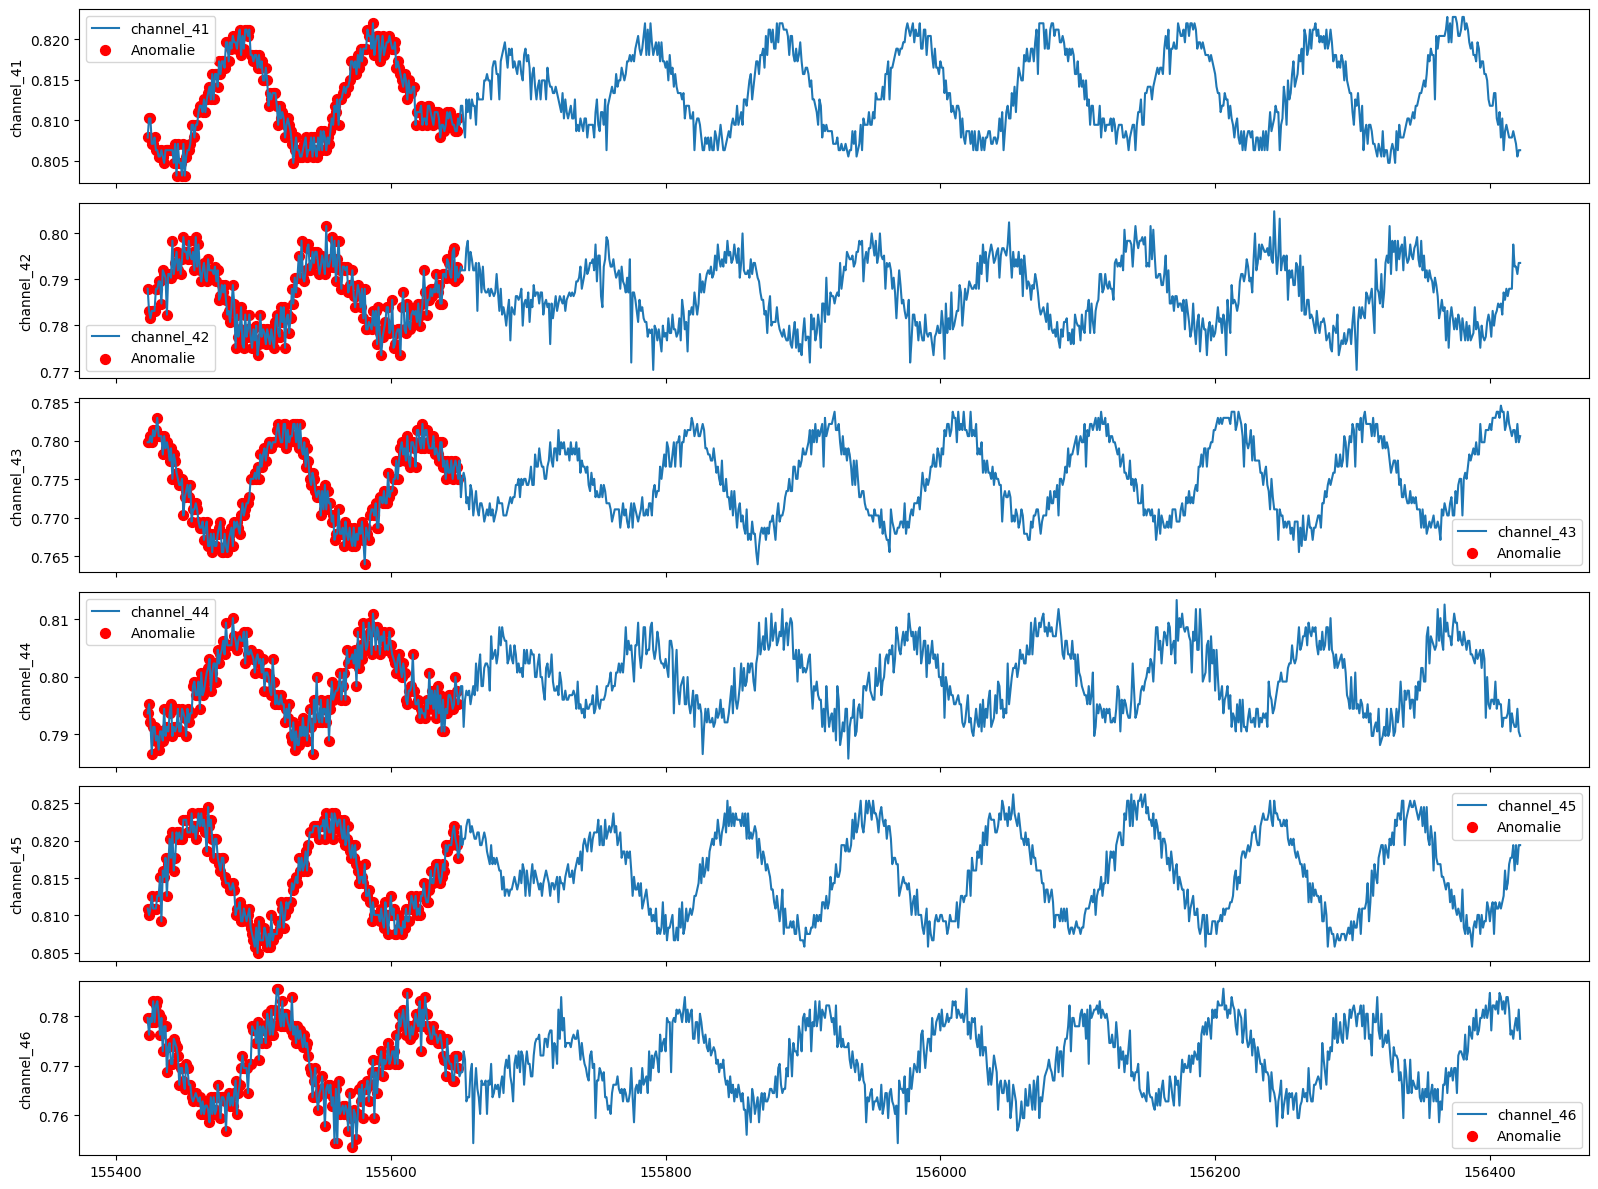

Anomaly
0    716
1    284
Name: count, dtype: int64


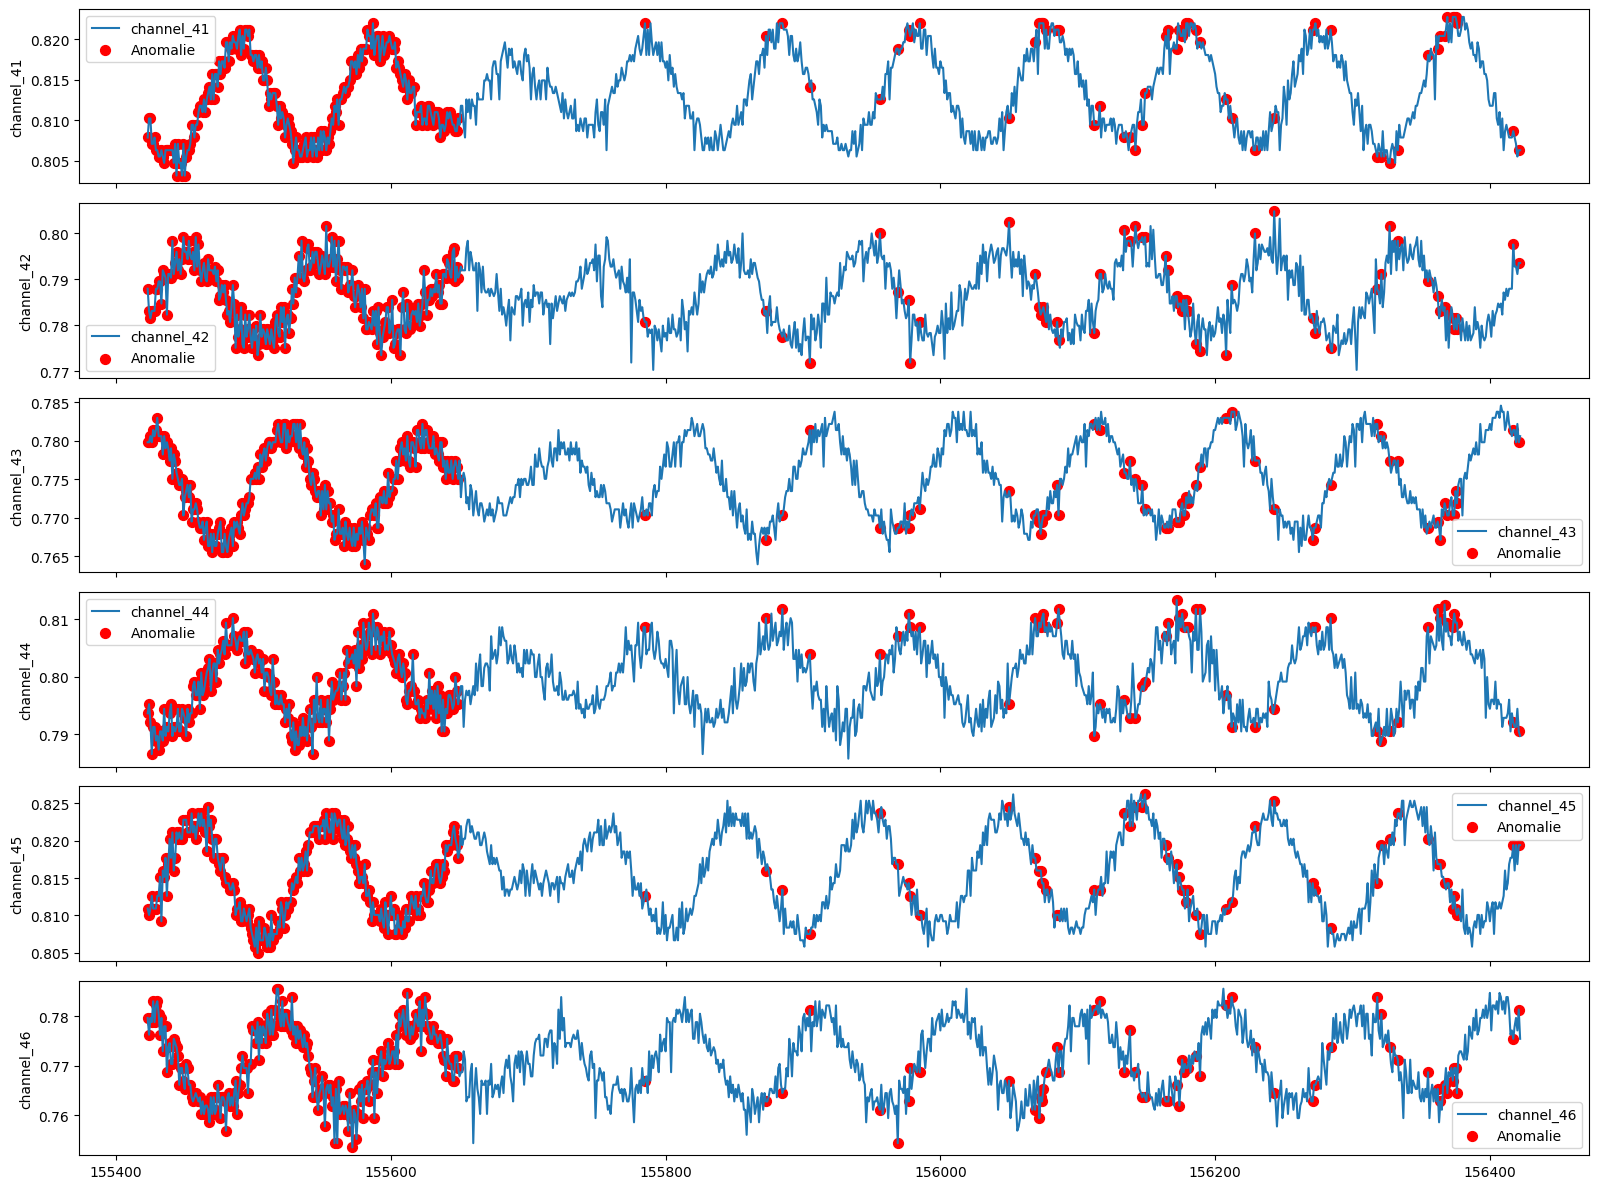

In [7]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Previous elements must be anomalies

In [14]:
n = 10

mask = df["Anomaly"].rolling(window=n, min_periods=1).sum() == n

# Applichiamo la maschera alla Series originale
df["Anomaly_2"] = df["Anomaly"] * mask

print(df["Anomaly"])


accuracy = accuracy_score(df['is_anomaly'], df["Anomaly_2"])
precision = precision_score(df['is_anomaly'], df["Anomaly_2"])
recall = recall_score(df['is_anomaly'], df["Anomaly_2"])
f1 = f1_score(df['is_anomaly'], df["Anomaly_2"])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

0           0
1           0
2           1
3           0
4           1
           ..
14728316    1
14728317    0
14728318    0
14728319    0
14728320    0
Name: Anomaly, Length: 14728321, dtype: int32
Accuracy: 0.9809809278328466
Precision: 0.99997072921438
Recall: 0.8186119587799785
F1 Score: 0.9002483117967155


is_anomaly
0    773
1    227
Name: count, dtype: int64


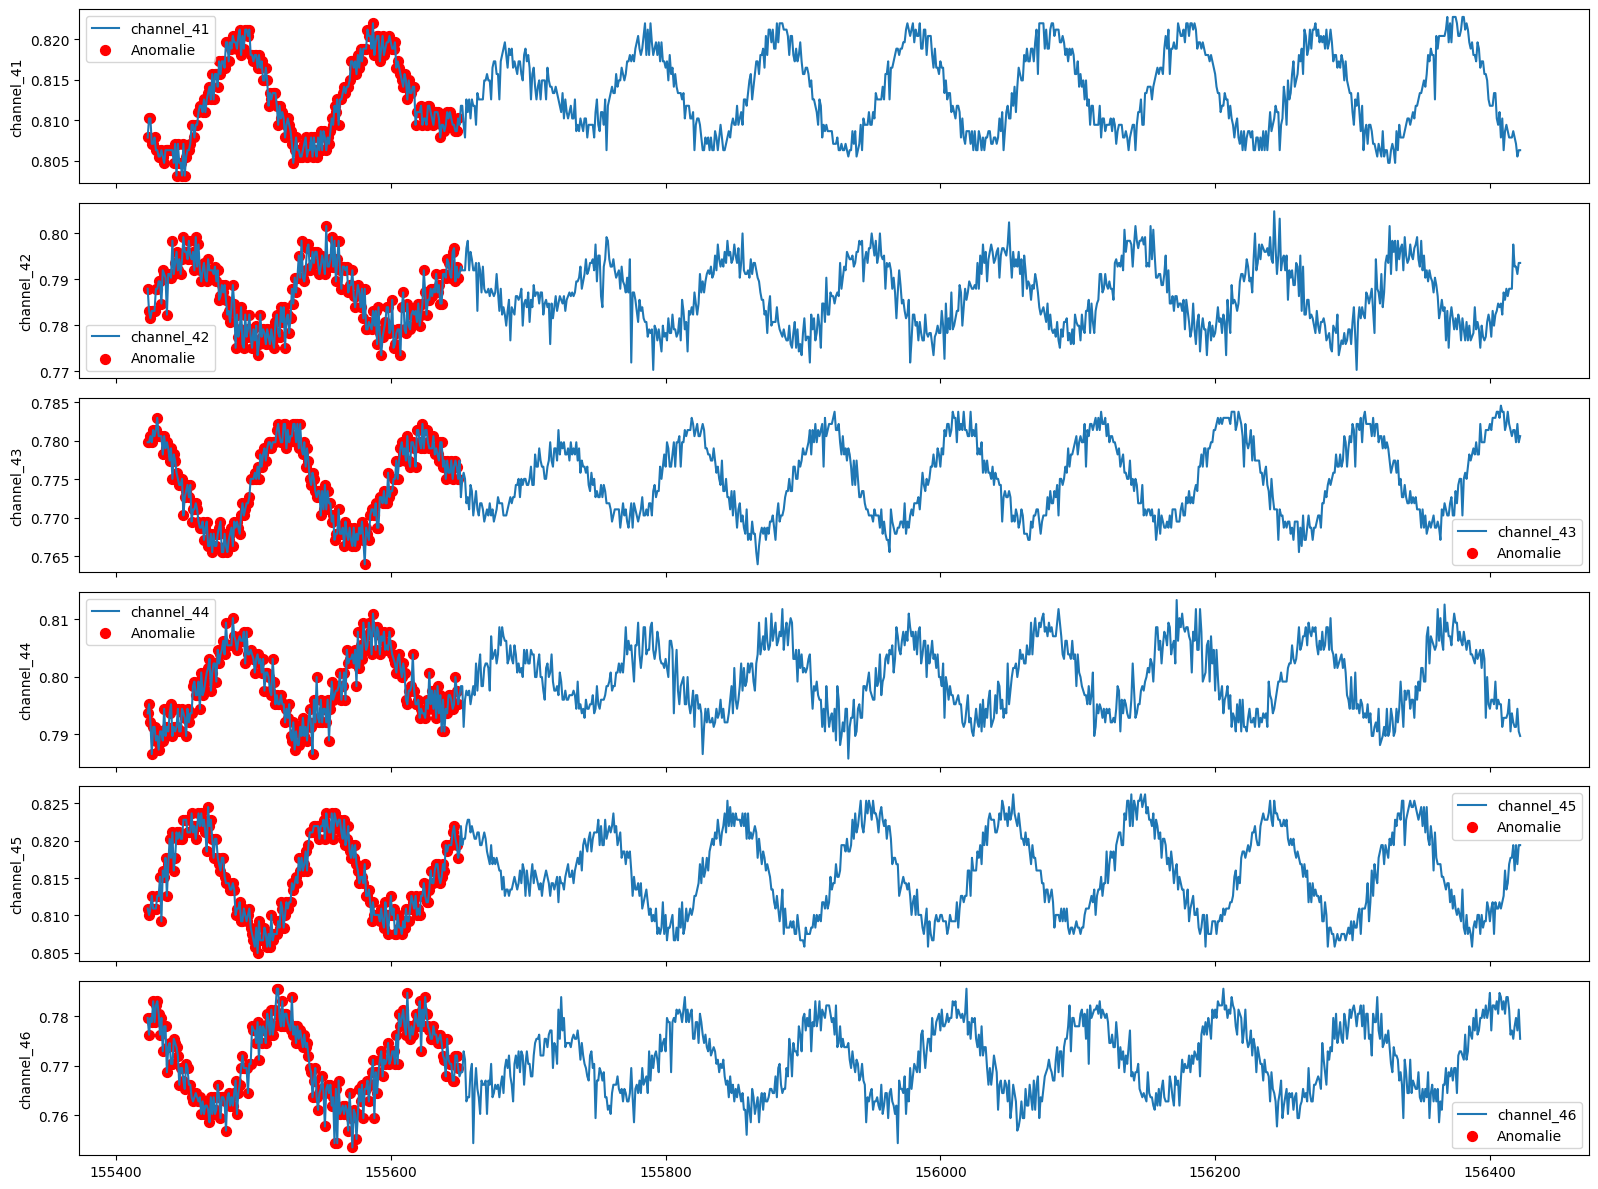

Anomaly_2
0    773
1    227
Name: count, dtype: int64


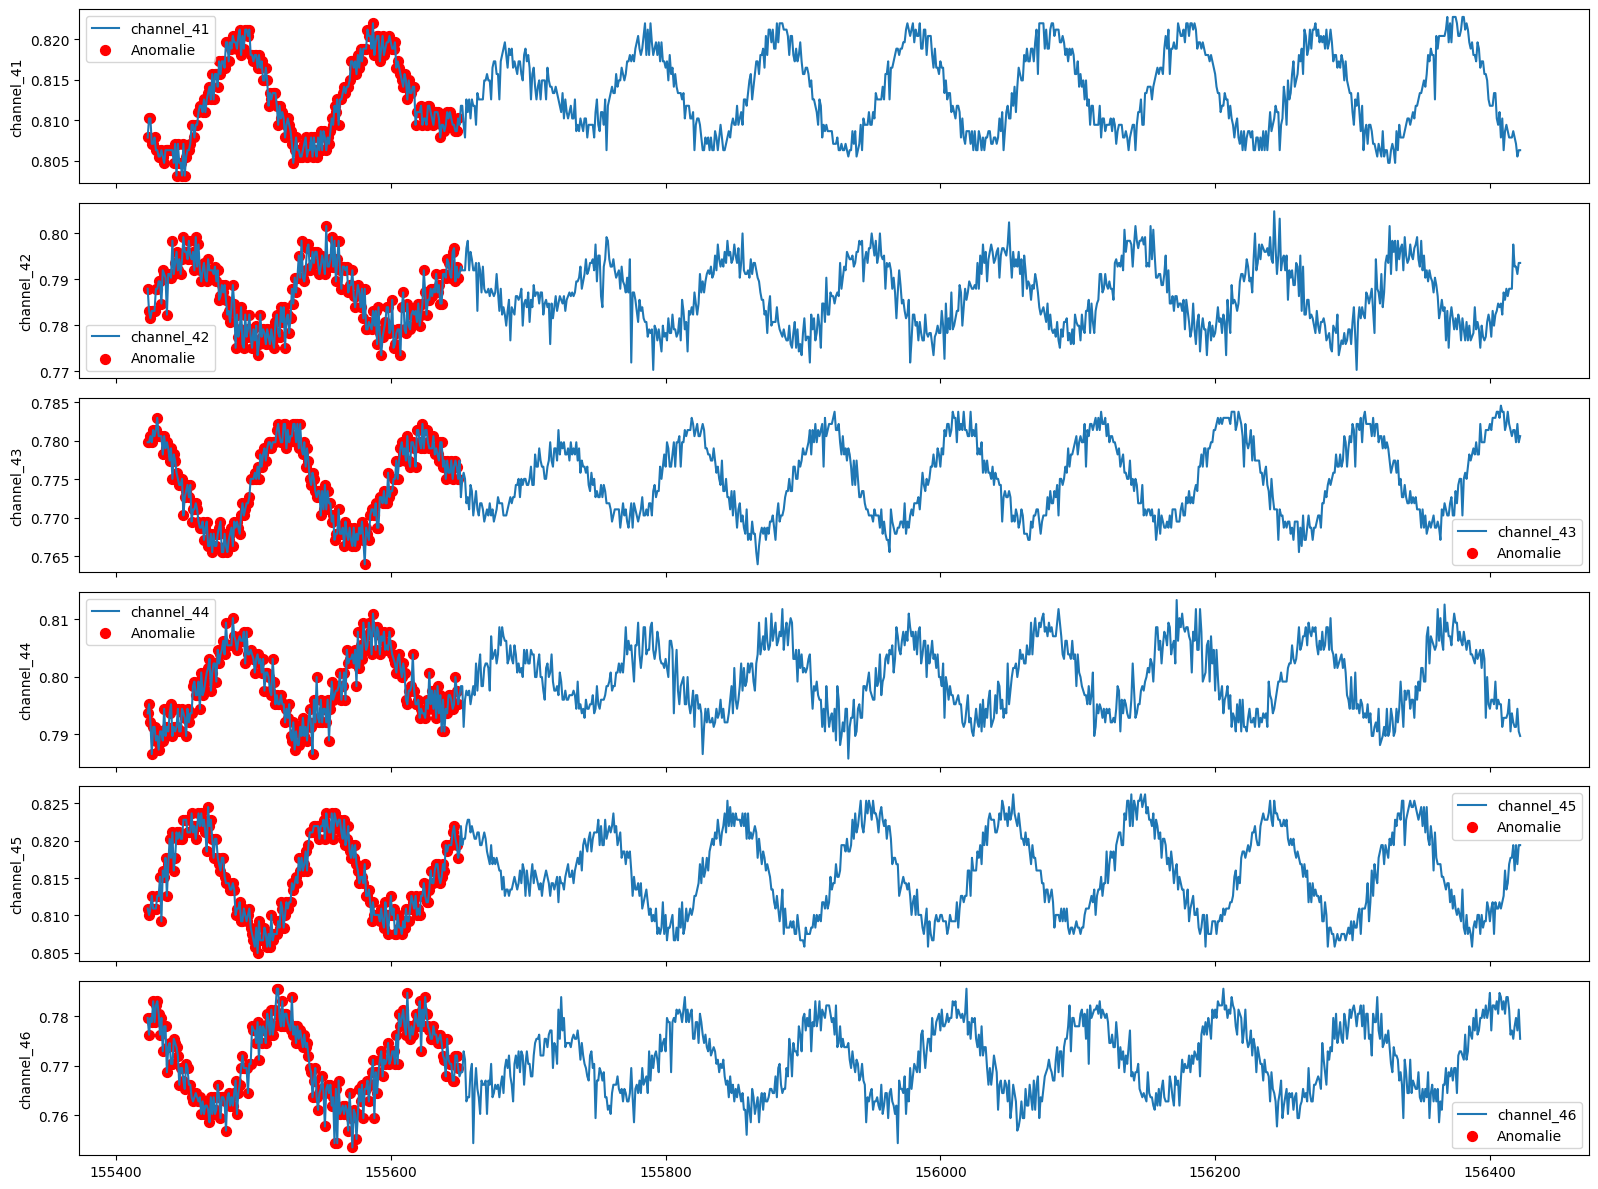

In [13]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly_2'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Groups of anomalies

In [18]:
n = 5

groups = (df["Anomaly"] != df["Anomaly"].shift()).cumsum()
group_sizes = df["Anomaly"].groupby(groups).transform('sum')

# Manteniamo solo i gruppi con almeno n elementi
df["Anomaly_3"] = df["Anomaly"] * (group_sizes >= n)


accuracy = accuracy_score(df['is_anomaly'], df["Anomaly_3"])
precision = precision_score(df['is_anomaly'], df["Anomaly_3"])
recall = recall_score(df['is_anomaly'], df["Anomaly_3"])
f1 = f1_score(df['is_anomaly'], df["Anomaly_3"])

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Accuracy: 0.9926081866358019
Precision: 0.9987018501415248
Recall: 0.9307035018366638
F1 Score: 0.9635044375350938


is_anomaly
0    773
1    227
Name: count, dtype: int64


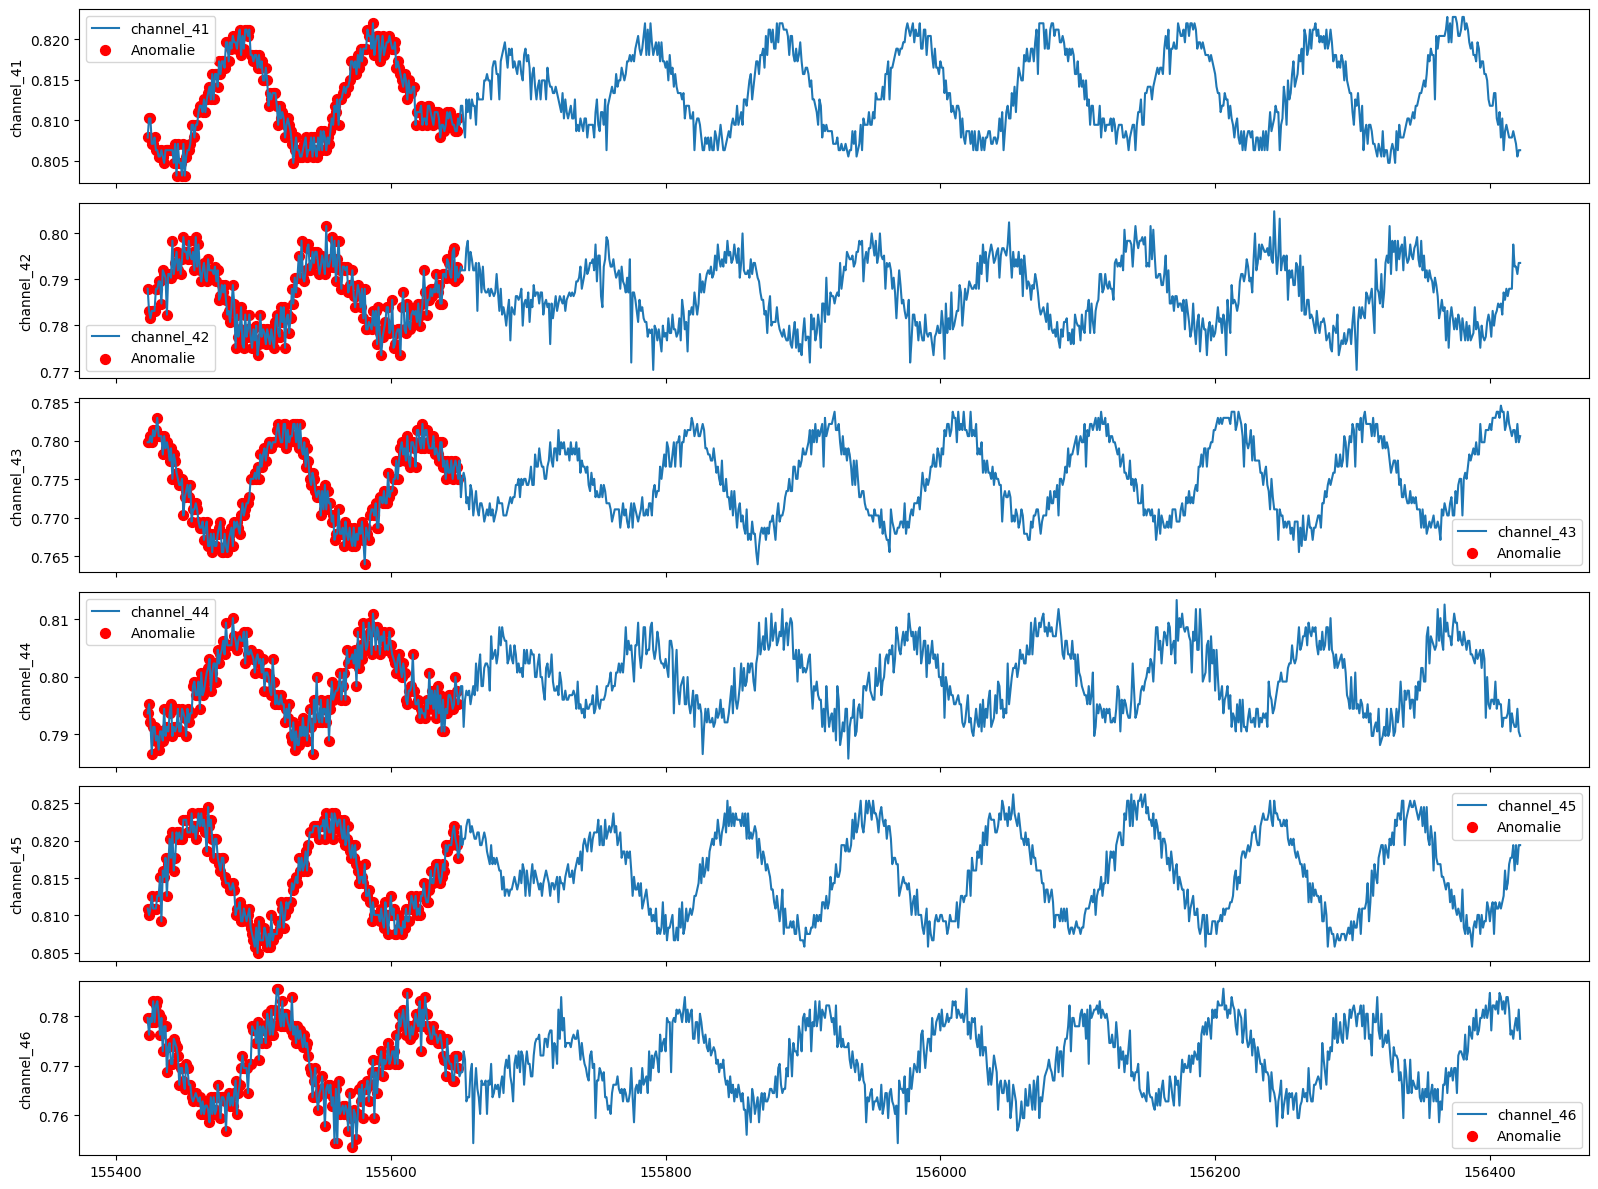

Anomaly_3
0    773
1    227
Name: count, dtype: int64


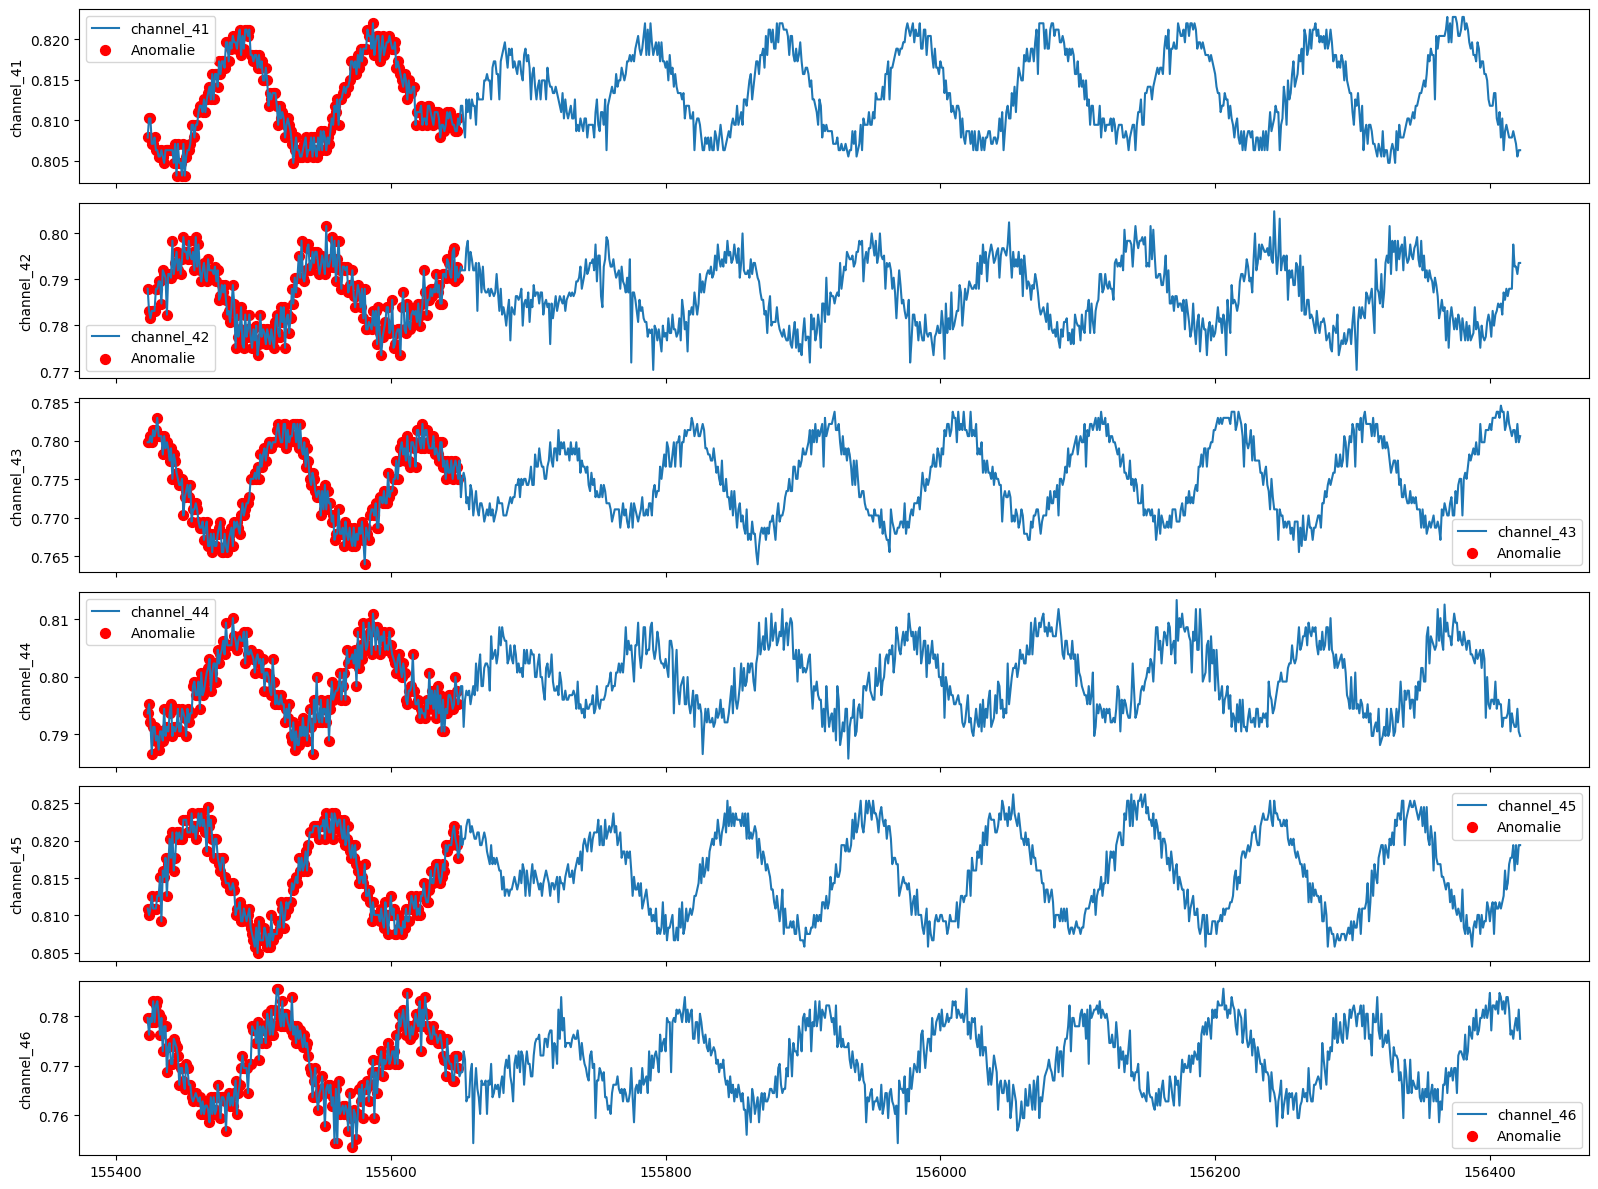

In [19]:
# Define columns to plot
columns_to_plot = ["channel_41", "channel_42", "channel_43", "channel_44", "channel_45", "channel_46"]

# colonna che indica il ground truth delle anomalie
col_anomaly = 'is_anomaly'
n_row_to_plot = 1000
start = df[col_anomaly].idxmax() + 40040


# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'is_anomaly'

small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()

# Create subplots (one row per column)
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(16, 12), sharex=True)


col_anomaly = 'Anomaly_3'
small = df[start:start+n_row_to_plot]
outlier = small[small[col_anomaly] == 1]

print(small[col_anomaly].value_counts())

# Plot each column in a separate subplot
for ax, col in zip(axes, columns_to_plot):
    ax.plot(df.iloc[start:start+n_row_to_plot][col], label=col)
    ax.scatter(outlier.index, outlier[col], color='red', label='Anomalie', s=50)
    ax.set_ylabel(col)
    ax.legend()

# Set common X label

plt.tight_layout()
plt.show()